In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [2]:
#create a pandas dataframes from csv files
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [3]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [4]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

# Data Understanding

## Missing values analysis

In [5]:
tweets.isna().sum()

id                      2
user_id            217283
retweet_count      437134
reply_count        647878
favorite_count     647542
num_hashtags      1057524
num_urls           648623
num_mentions       854165
created_at              0
text               537721
dtype: int64

## Duplicates analysis

In [6]:
distinct_rows = len(tweets.value_counts())

In [7]:
print("Total lenght: " + str(len(tweets.index)))
print("Total distinct rows: " + str(distinct_rows))
print("--------------------------------------")
print("Total duplicates: " + str(len(tweets.index) - distinct_rows))

Total lenght: 13664696
Total distinct rows: 10124682
--------------------------------------
Total duplicates: 3540014


#### It's useful to know if there are some different rows that have the same id

In [8]:
distinct_id_rows = len(tweets.value_counts(subset=['id']))

In [9]:
print("Total duplicates id (different rows with same id): " + str(distinct_id_rows - distinct_rows))

Total duplicates id (different rows with same id): 1547453


## Outlier analysis

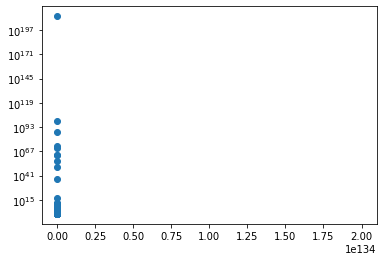

In [91]:
plt.scatter(tweets['retweet_count'], tweets['favorite_count'])
plt.yscale('log')
plt.show()

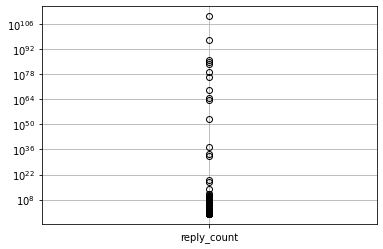

In [92]:
boxplot = tweets.boxplot(column=['reply_count'])
plt.yscale('log')

In [79]:
tweets['retweet_count'].quantile(0.9999965)

4990797.790440127

In [89]:
tweets['reply_count'].quantile(0.9999)

8572.262480005622

In [84]:
tweets['reply_count'].quantile(0.25)

0.0

In [142]:
t = tweets[(tweets['id'].notna()) & (tweets['retweet_count'].notna()) & (tweets['reply_count'].notna()) & (tweets['favorite_count'].notna())]


In [143]:
t['retweet_count'].quantile(0.75) + 1.5*(t['retweet_count'].quantile(0.75)-t['retweet_count'].quantile(0.25))

2.5

In [144]:
t['reply_count'].quantile(0.75) + 1.5*(t['reply_count'].quantile(0.75)-t['reply_count'].quantile(0.25))

0.0

In [147]:
n = math.log((len(t.index) - t['retweet_count'].isna().sum()) + 1)
n

16.308816253476365

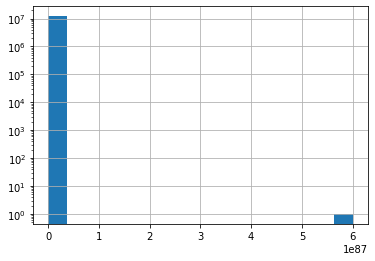

In [146]:
t['favorite_count'].hist(bins=16)
plt.yscale('log')

In [121]:
tweets[tweets['id'].isna()].head(50)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
32,NaN,2.214453e+09,1.0,0.0,2.0,NaN,NaN,NaN,2019-01-18 01:13:23,NaN
60,NaN,1.532124e+07,NaN,NaN,NaN,NaN,0.0,2.0,2016-03-07 03:40:53,@abc7 @CharlieSheen Anything he says can and w...
71,NaN,5.224195e+08,0.0,NaN,0.0,NaN,0.0,NaN,2019-10-15 13:18:57,NaN
161,NaN,2.211927e+09,0.0,NaN,NaN,NaN,NaN,NaN,2020-01-29 00:24:20,NaN
183,NaN,1.241381e+09,0.0,NaN,0.0,0.0,0.0,2.0,2020-03-02 12:39:07,@Shpuld @GavinEdgington Also I often aligned t...
237,NaN,4.681245e+08,0.0,NaN,NaN,NaN,NaN,NaN,2019-11-03 10:24:13,"Dietro un grande uomo, c'Ã¨ sempre una grande ..."
269,NaN,2.506456e+08,0.0,0.0,NaN,NaN,NaN,NaN,2019-02-20 21:02:26,The little girls getting favors from the refer...
273,NaN,2.220714e+07,0.0,NaN,0.0,NaN,NaN,NaN,2019-06-02 21:32:27,NaN
304,NaN,1.722074e+08,NaN,0.0,1.0,0.0,0.0,0.0,2020-02-15 04:13:22,My brother listens to some country
375,NaN,3.688013e+08,0.0,NaN,0.0,NaN,0.0,NaN,2020-04-19 02:21:58,NaN


## Attributes types

In [10]:
#check attrbutes type

In [11]:
tweets['id'] = pd.to_numeric(tweets['id'], errors='coerce')
tweets['user_id'] = pd.to_numeric(tweets['user_id'], errors='coerce')
tweets['retweet_count'] = pd.to_numeric(tweets['retweet_count'], errors='coerce')
tweets['reply_count'] = pd.to_numeric(tweets['reply_count'], errors='coerce')
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets['num_hashtags'] = pd.to_numeric(tweets['num_hashtags'], errors='coerce')
tweets['num_mentions'] = pd.to_numeric(tweets['num_mentions'], errors='coerce')
tweets['num_urls'] = pd.to_numeric(tweets['num_urls'], errors='coerce')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')

In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.0+ GB


# Data Preparation

## Select Attributes

## Reduce Data Dimension

In [13]:
#eliminazione duplicati

## Select Records

In [14]:
#eliminazione record senza dati (?)

## Treat Missing Values

In [15]:
# trasformazione nan (media o mediana)

## Treat Outliers

## Integrate, Unify and Transform Data

## Improve Data Quality

### Check created_at attributes of tweets

In [17]:
count_future = 0
count_past = 0
wrong_list = []
now = datetime.now()
launch_twitter = datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")

for index, row in tweets['created_at'].items():
    if (now - row).days < 0:
        count_future += 1
        wrong_list.append(index)
    if (row - launch_twitter).days < 0:
        count_past += 1
        wrong_list.append(index)

NameError: name 'counting_past' is not defined

In [18]:
count_past + count_future

97605

In [ ]:
#count how much wrong data id
wrong_id = 0;
index_list = [];
for index, row in tweets['id'].items():
    #check id value
    if not isinstance(row, float):
        if not row.isnumeric():
            wrong_id = wrong_id + 1;
            index_list.append(index);
wrong_id

In [ ]:
#count how much wrong data id to verify 
wrong_id = 0;
index_list = [];
for index, row in tweets['id'].items():
    #check id value
    if not isinstance(row, float):
        if not row.isnumeric():
            wrong_id = wrong_id + 1;
            index_list.append(index);
wrong_id

In [ ]:
#delete all the wrong ids
tweets.drop(index_list, inplace=True)
tweets

In [ ]:
#count how much wrong retweet we have
wrong_retweet = 0
w_retweet_lst = []

for index, row in tweets['retweet_count'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_retweet += 1
            w_retweet_lst.append(index)
    else:
        wrong_retweet += 1
        w_retweet_lst.append(index)

In [ ]:
wrong_retweet

## Count how much wrong retweet we have

In [ ]:
wrong_reply = 0
w_reply_lst = []

for index, row in tweets['reply_count'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_reply += 1
            w_reply_lst.append(index)
    else:
        wrong_reply += 1
        w_reply_lst.append(index)
wrong_reply

## Count how much wrong favorite we have

In [ ]:
wrong_favorite = 0
drop_fav_list = []
nan = 0;

for index, row in tweets['favorite_count'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            
            if '.' in row:
                row = int(row.split('.')[0])
            
            elif '-' in row:
                row = 0
                        
            else:
                
                drop_fav_list.append(index)
            
            wrong_favorite += 1
            
        else:
            row = int(row)

In [ ]:
tweets.drop(drop_fav_list, axis=0, inplace=True)

In [ ]:
#tweets['favorite_count'].isna().sum()
#tweets.dropna(subset=['favorite_count'], inplace=True)
a = tweets.astype('int32', errors='ignore')
a.dtypes

In [ ]:
a.sort_values('favorite_count', ascending=False).head(50)

In [ ]:
a['favorite_count'].max()

## Check num_hashtag attributes:

In [ ]:

wrong_htag = 0
w_htag_lst = []

for index, row in tweets['num_hashtags'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_htag += 1
            w_htag_lst.append(index)
    else:
        wrong_htag += 1
        w_htag_lst.append(index)
wrong_htag
tweets['num_hashtags'][w_htag_lst[1000]]

# Check created_at attributes: 

In [ ]:
count_past

In [ ]:
count_future

In [ ]:
type(tweets['num_urls'][0])

## Count how much wrong num_url we have

In [ ]:
len(tweets_.id.unique())
#tweets_ = tweets_.drop_duplicates('id')

In [ ]:
wrong_url = 0
w_url_lst = []

for index, row in tweets['num_urls'].items():
    #check url value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_url += 1
            w_url_lst.append(index)
    else:
        wrong_url += 1
        w_url_lst.append(index)
wrong_url

## Count how much wrong num_mentions we have

In [ ]:
wrong_mentions = 0
w_mentions_lst = []

for index, row in tweets['num_mentions'].items():
    #check url value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_mentions += 1
            w_mentions_lst.append(index)
    else:
        wrong_mentions += 1
        w_mentions_lst.append(index)
wrong_mentions

# Check the attribute of the USERS file

#### sort users by id

In [ ]:
users.sort_values(by=['id'], inplace=True)

#### correction of the langauge attribute

In [ ]:
users.lang.unique()

In [ ]:
for index, row in users['lang'].items():
    users['lang'][index] = row.lower()  
    if row == 'select language...': 
        2-1 #dosomething

#### plotting the bar graph on languages

In [ ]:
users['lang'].value_counts().plot(kind='bar', title='Languages')
plt.show()

In [ ]:
tweets.isna().sum()

In [ ]:
tweets.dtypes

In [ ]:
tweets.sort_values('reply_count', ascending=False).head(30)

In [ ]:
tweets.dropna(subset=['id', 'user_id'], inplace=True)

In [ ]:
tweets.isna().sum()

# Check the user_id in users db